# pyEPR Startup Example
### Single transmon qubit mode analysis  
Author: Zlatko Minev

#### Load pyEPR

Let us first load pyEPR.

In [2]:
import pyEPR

First time load of config


##### Connect to HFSS

1. The first task is to specify where your simulation project is located, what is the filename and what design of the project you wish to work on.
2. Define the junction parameters used in the simulation. The junciton is defined as described in the paper and on the landing page of pyEPR. There is a rectangle sheet inductance and a polyline that defines the current and voltage on the sheet. 

In [2]:
from pyEPR import * 
logger.setLevel(logging.INFO)

# First, connect to HFSS project
pinfo = Project_Info(r"C:\path-to-my-dir", # Path to directory containing HFSS project
                       'My file name',     # Name of HFSS project, i.e., the filename; can be left none to get current project if HFSS is open
                       'My design name'    # Name of HFSS design; Can be left None to get current path 
                    ).connect() 





Connecting to HFSS ...
	File path to HFSS project found.
	Opened HFSS-App.
	Opened HFSS desktop.
	Opened link to HFSS user project.
	Connected successfully.
	 :)	 :)	 :)	



Second, for any Josephson tunnel junction, specify parameters. In this example,
we first consider a single junction. We will call it `j1`. It has the
following properties:

  1. **Lj_variable** : Name of HFSS variable that specifies junction inductance Lj defined on the boundary condition in HFSS
  2. **rect**        : Name of HFSS rectangle on which lumped boundary condition is specified.
  3. **line**        : Name of HFSS polyline which spans the length of the recntalge. Used to define the voltage across the junction. 
  4. **length**      : Length in HFSS of the junction rectangle and line (specified in meters).

In [ ]:
pinfo.junctions['j1'] = {'Lj_variable' : 'Lj1', 
                         'rect'        : 'JJrect1', 
                         'line'        : 'JJline1', 
                         'length'      : parse_units('30um')}


'Check that valid names of variables and objects have been supplied.'
pinfo.validate_junction_info()  

### Run analysis on an eigenmode solution  

After you solved the HFSS *eigenmode* design. Run the cells below.

For example, the following cell will get the frequencies and Qs from HFSS. 

In [5]:
epr_hfss = pyEPR_HFSS(pinfo)
# This is the core object for interacting with HFSS 
# and running analysis within HFSS.

print(f"\nAll solved frequencies in HFSS\n")
display(epr_hfss.get_freqs_bare('0'))

Design "My Design - Qubit Example EPR" info:
	# eigenmodes    1
	# variations    1

All solved frequencies in HFSS



(OrderedDict([('freq_bare_0', 5656326623.7300005), ('Q_0', 0)]),
 [5656326623.7300005])

####  Full analysis

Let's now jump ahead to the full analysis.

In [6]:
epr_hfss.do_EPR_analysis();


Variation 0  [1/1]
  Mode 0 [1/1]
    Calculating ℰ_electric, ℰ_magnetic
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H 
               99.6%      3.984   0.01571

    Calculating junction EPR [method=line_voltage]
	junction        EPR p_0j   sign s_0j
	j1              0.995824     -

ANALYSIS DONE. Data saved to:




### Run hamiltonian analysis on the solutions 

	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

[[0.99605749]] [[-1]] [[5.65632662]] [[12.57396252]]
Pm_norm = 0    1.000234
dtype: float64 
*** P (participation matrix, not normlz.)
       p_j1
0  0.995824

*** S (sign-bit matrix)
   s_j1
0    -1
*** P (participation matrix, normalized.)
         1

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       316

*** Chi matrix ND (MHz) 
       370

*** Frequencies O1 PT (MHz)
0    5340.771222
dtype: float64

*** Frequencies ND (MHz)
0    5319.987368
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0]


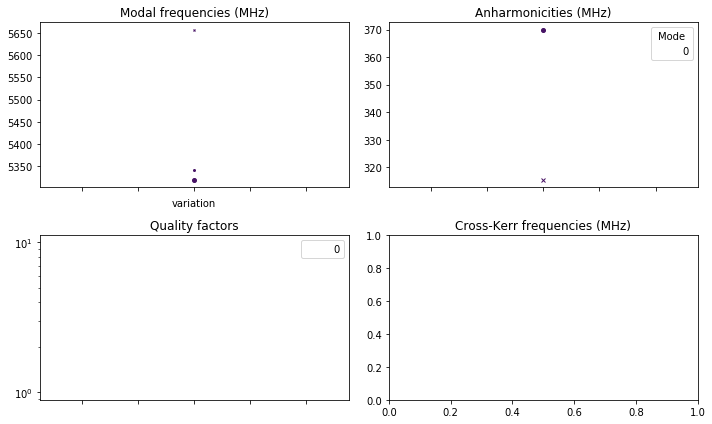

In [8]:
%matplotlib inline

# Load saved solutions
epr      = pyEPR_Analysis(epr_hfss.data_filename)
# This is the core object for working with post 
# processing data from HFSS

# Analyze 
epr.analyze_all_variations(cos_trunc = 8, fock_trunc = 15)
epr.plot_Hresults();

# Addendum - Snippets for ease 

An easy way to define many junctions is the following:

In [ ]:
# Specify multiple junctions in HFSS model
n_junctions = 5
for i in range(1, 1+n_junctions):
    pinfo.junctions[f'j{i}'] = {'Lj_variable' : f'Lj{i}',
                                'rect'        : f'JJrect{i}',
                                'line'        : f'JJline{i}',
                                'length'      : parse_units('30um')}

Here we have used python3 f-strings for ease